# Introduction to Qiskit

This notebook will teach you the basics of IBM Qiskit. We shall cover both simulation of quantum circuits and execution of quantum circuits on real quantum computers.

# Install Qiskit

Install Qiskit if you haven't. Here we are not installing the latest version of Qiskit since it has an issue with displaying circuits using matplotlib (fancy circuits) in Colab.

In [ ]:
!pip install qiskit==0.16.1

# Importing Packages

In [2]:
from qiskit import * # No need to explain why
import matplotlib as mpl # Required to display some fancy circuits
import numpy as np # Required to use pi
from qiskit.providers.ibmq import least_busy # Required to get the least busy quantum computer

# Creating circuits

How to create quantum circuits in Qiskit

## Step 1: Initialize circuit

Prepare the quantum circuit. This requires three steps:
1. Decide how many qubits are required and prepare the quantum register according to that.
2. Based on how many qubits are finally measured in your circuit, we prepare the classical registers, which will hold the final result after each execution.
3. Combine these register to initialize the circuit. 

In [79]:
# Prepare the quantum register
qr = QuantumRegister(2)

In [80]:
# Prepare the classical register
cr = ClassicalRegister(2)

In [81]:
# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

## Step 2: Apply gates

Now, we shall start applying the gates

In [82]:
# X gate
qc.x(0)

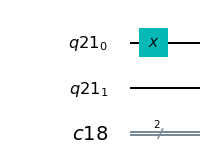

In [83]:
# Visualize the circuit
qc.draw(output = 'mpl')

In [84]:
# Hadamard gate
qc.h(0)

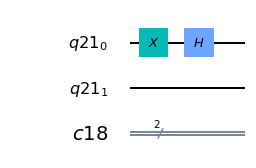

In [85]:
# Visualize the circuit
qc.draw(output = 'mpl')

In [86]:
# Rx gate
qc.rx(np.pi/4,0)

# Ry gate
qc.ry(np.pi/8,0)

# Rz gate
qc.rz(np.pi/16,0)

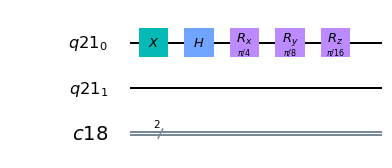

In [87]:
# Visualize the circuit
qc.draw(output = 'mpl')

In [88]:
# CNOT gate
qc.cnot(0,1)

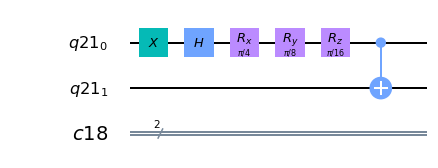

In [89]:
# Visualize the circuit
qc.draw(output = 'mpl')

## Step 3: Measure

In [90]:
# Measure qubits 0,1
qc.measure(0, 0)
qc.measure(1, 1)

# Circuit Simulation

Measurement result: {'00': 688, '11': 312}


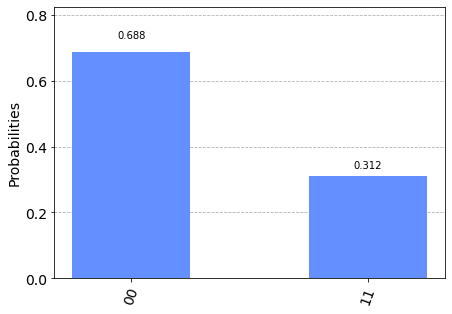

In [91]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display histogram of output
visualization.plot_histogram(counts)

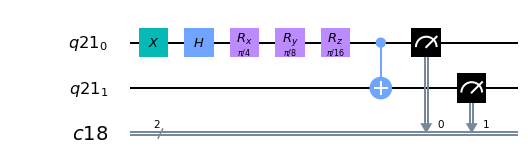

In [92]:
# Visualize the circuit
qc.draw(output = 'mpl')

# Run on real quantum computers

Next we shall run circuits on the actual IBM quantum computers. First we shall simulate the circuit for Deustch circuit, which is a $2$ qubit circuit.

Measurement result: {'1': 1000}


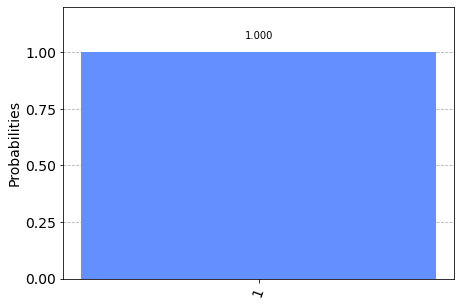

In [101]:
# Prepare the circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 1
qc.x(1)
qc.h(1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Oracle
qc.cnot(0,1)
qc.x(1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Measure qubit 0
qc.measure(0, cr)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display histogram of output
visualization.plot_histogram(counts)

We can see that the the result is always 1.

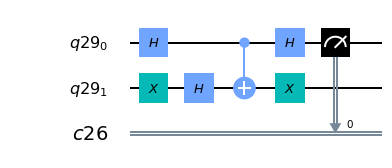

In [102]:
# Display circuit
qc.draw(output = "mpl")

Next we shall run the same circuit on IBM quantum computers. First step is to connect to your IBM quantum account, and choose an appropriate quantum computer to run your circuit.

In [103]:
# Login to IBM account and copy your token
IBMQ.save_account("b5b783be1c99de59372c6f4d6b486454a5d53394497a0856a88f79484252677bd0822a822442f20f825d6c898869c5c4294140f9202dea50ad797546b196f7e9")

# Load account
IBMQ.load_account()

# Choose which computer you want to run your algorithm. We want one with at least 2 qubits.
provider = IBMQ.get_provider('ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))

Credentials already present. Set overwrite=True to overwrite.
Credentials are already in use. The existing account in the session will be replaced.
Remote backend "ibmq_lima" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.'], 'qasm_def': ['Field may not be null.']}}}"
Remote backend "ibmq_belem" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.'], 'qasm_def': ['Field may not be null.']}}}"
Remote backend "ibmq_quito" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.'], 'qasm_def': ['Field may not be null.']}}}"
Remote backend "ibmq_manila" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map':

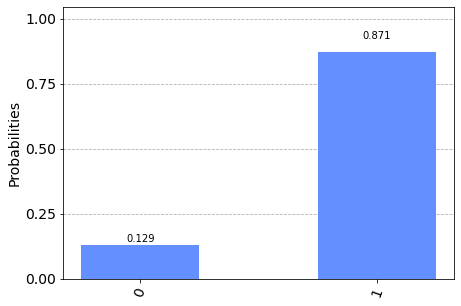

In [104]:
# Prepare the circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 1
qc.x(1)
qc.h(1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Oracle
qc.cnot(0,1)
qc.x(1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Measure qubit 0
qc.measure(0, cr)

# Run on the chosen quantum computer
shots = 1000
job = execute(qc, backend, shots=shots)
results = job.result()
counts = results.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

We can clearly see the prepsence of error as the actual circuit should always result in 1.

Our next example is a larger circuit, which is an example of quantum counting.

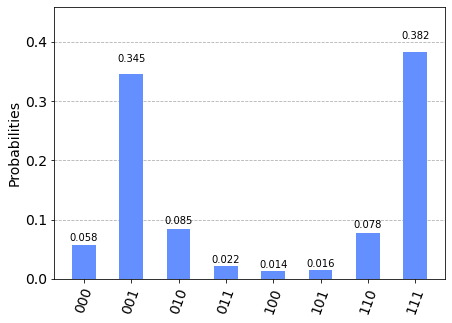

In [105]:
# Prepare quantum register
qr = QuantumRegister(5)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)


# Apply Hadamard gate on all qubits
for i in range(5):
  qc.h(i)

# Apply controlled-G gates
for control_qubit in range(3):
  for j in range(2 ** control_qubit):

    # Apply U_s
    qc.h(4)
    qc.ccx(control_qubit,3,4)
    qc.h(4)
    
    # Apply U_w
    qc.ch(control_qubit, 3)
    qc.ch(control_qubit, 4)

    qc.cz(control_qubit, 3)
    qc.cz(control_qubit, 4)

    qc.h(4)
    qc.ccx(control_qubit, 3, 4)
    qc.h(4)

    qc.ch(control_qubit, 3)
    qc.ch(control_qubit, 4)

    
# Apply inverse QFT
# Apply swap gates
qc.swap(0, 2)

# Apply controlled-Rk inverse gates
for target_qubit in range(3):
  for control_qubit in range(target_qubit):
    qc.cu1(-np.pi/float(2**(target_qubit-control_qubit)), control_qubit, target_qubit)
  qc.h(target_qubit)

# Measure qubits 0
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

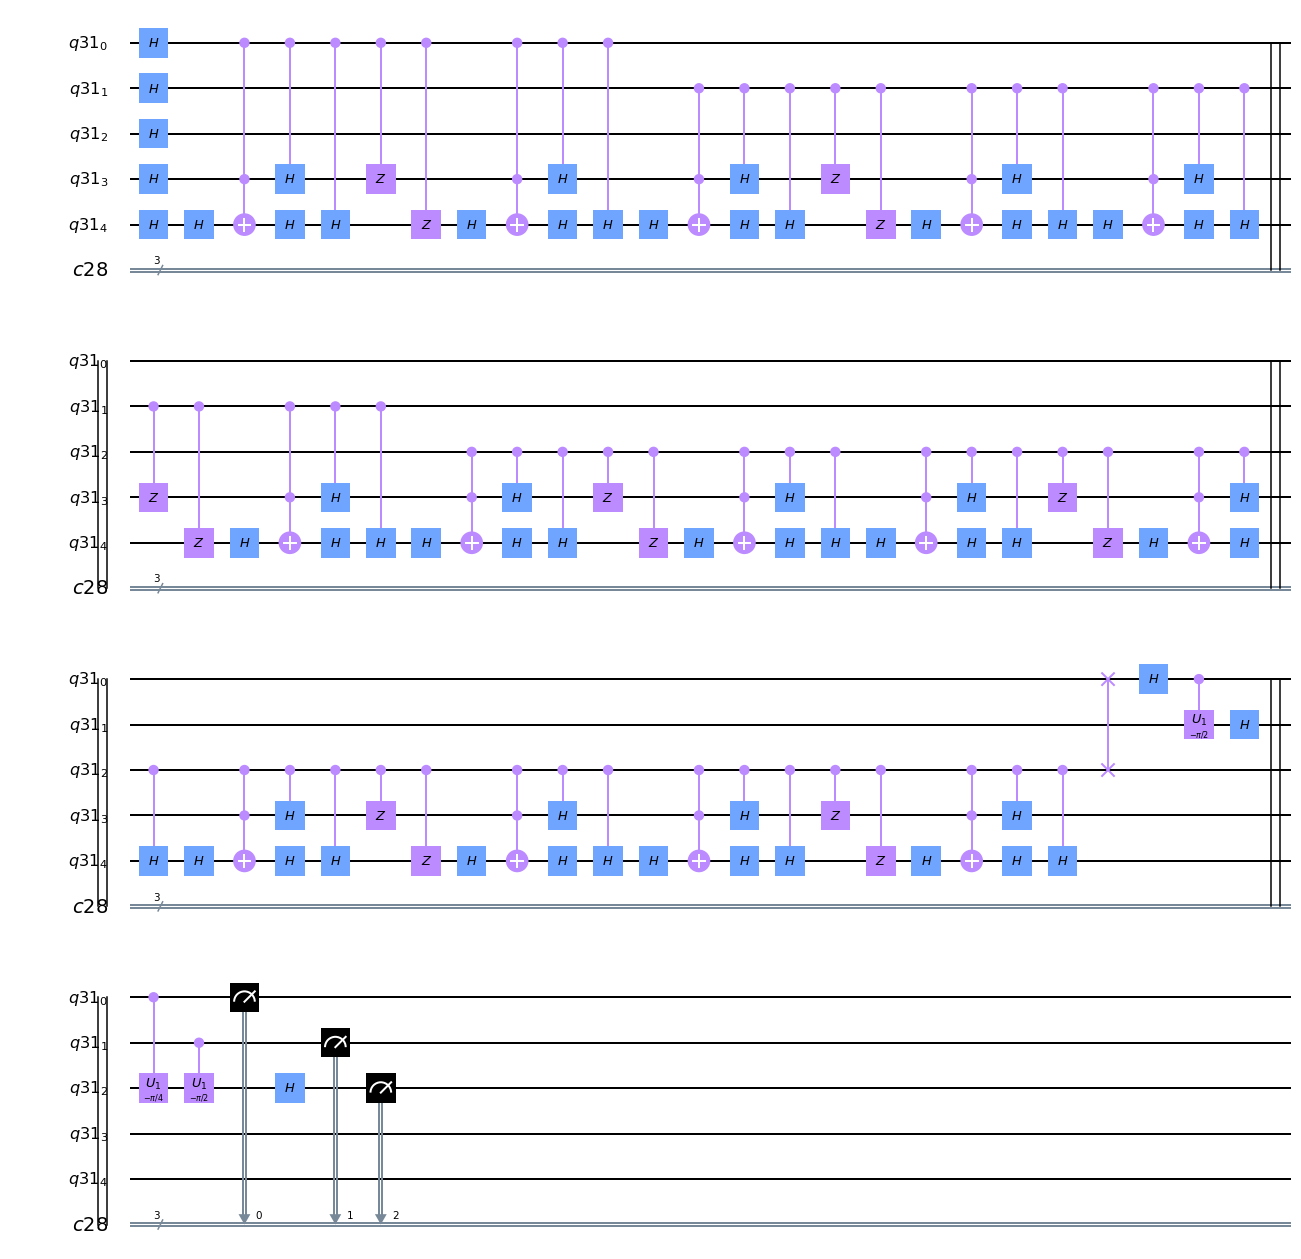

In [106]:
# Display the circuit
qc.draw(output='mpl')

As we did last time, we shall run the same quantum counting circuit on IBM quantum computers.

In [107]:
# Login to IBM account and copy your token
IBMQ.save_account("b5b783be1c99de59372c6f4d6b486454a5d53394497a0856a88f79484252677bd0822a822442f20f825d6c898869c5c4294140f9202dea50ad797546b196f7e9")

# Load account
IBMQ.load_account()

# Choose which computer you want to run your algorithm. We want one with at least 5 qubits.
provider = IBMQ.get_provider('ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                        not x.configuration().simulator and x.status().operational==True))

Credentials already present. Set overwrite=True to overwrite.
Credentials are already in use. The existing account in the session will be replaced.
Remote backend "ibmq_lima" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.'], 'qasm_def': ['Field may not be null.']}}}"
Remote backend "ibmq_belem" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.'], 'qasm_def': ['Field may not be null.']}}}"
Remote backend "ibmq_quito" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.'], 'qasm_def': ['Field may not be null.']}}}"
Remote backend "ibmq_manila" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'coupling_map':

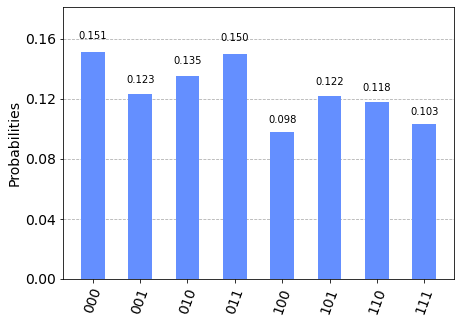

In [108]:
# Prepare quantum register
qr = QuantumRegister(5)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)


# Apply Hadamard gate on all qubits
for i in range(5):
  qc.h(i)

# Apply controlled-G gates
for control_qubit in range(3):
  for j in range(2 ** control_qubit):

    # Apply U_s
    qc.h(4)
    qc.ccx(control_qubit,3,4)
    qc.h(4)
    
    # Apply U_w
    qc.ch(control_qubit, 3)
    qc.ch(control_qubit, 4)

    qc.cz(control_qubit, 3)
    qc.cz(control_qubit, 4)

    qc.h(4)
    qc.ccx(control_qubit, 3, 4)
    qc.h(4)

    qc.ch(control_qubit, 3)
    qc.ch(control_qubit, 4)

    
# Apply inverse QFT
# Apply swap gates
qc.swap(0, 2)

# Apply controlled-Rk inverse gates
for target_qubit in range(3):
  for control_qubit in range(target_qubit):
    qc.cu1(-np.pi/float(2**(target_qubit-control_qubit)), control_qubit, target_qubit)
  qc.h(target_qubit)

# Measure qubits 0
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

# Run circuit on the chosen quantum computer
shots = 1000
job = execute(qc, backend, shots=shots)
results = job.result()
counts = results.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

One can clearly see that this large circuit, is affected by errors so bad, that the result is borderline useless.

# Reading the statevector

During simulations, Qiskit allows one to take a sneak peak at the state.

In [3]:
# Prepare quantum register
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

# Apply Hadamard gate on all qubits
for i in range(2):
  qc.h(i)

# Extract the statevector
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
print(statevector)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
